**Medidas del laboratorio**

$x_0$ = 0.5m  
$x_f$ = 1.3m  
$\Delta x$ = 0.4m  

Masa inicial con aleta: 0.197kg

Incertidumbre: 0.001kg

Deslizador solo: 0.187kg

Longitud aleta: 0.0116m

Bloque 1: 0.0213 m


Bloque 2: 0.03035 m

Bloque 3: 0.0425 m

Incertidumbre calibrador: 0.00005 m

Distancia entre fotosensores: 0.4m

***Experimento con bloque 1***

Serie 1: Masa regular

Serie 2: Masa 0.04Kg

Serie 3: Masa 0.1 kg

***Experimento con bloque 2***

Serie 4: Masa regular

Serie 5: Masa 0.04kg

Serie 6: Masa 0.1kg

***Experimento con bloque 3***

Serie 7: Masa regular 

Serie 8: Masa 0.04kg 

Serie 9: Masa 0.1kg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Experimental #

### Cálculo de Ángulos ###

In [8]:
m_1=0.197
m_2=m_1+0.04
m_3=m_1+0.1

b_1= 0.0213 
b_2= 0.03035
b_3= 0.0425

g=9.7803

a_1=np.arcsin(b_1) #Ángulo del bloque 1 
a_1=np.degrees(a_1)

a_2=np.arcsin(b_2) #Ángulo del bloque 2
a_2=np.degrees(a_2)

a_3=np.arcsin(b_3) #Ángulo del bloque 3
a_3=np.degrees(a_3)

print(a_1, a_2, a_3)

1.2204924030276227 1.7391939797228742 2.4358042835065783


-----------------------------------------------------------------

### Importe de datos, calculo de promedios y desviaciónes ###

In [5]:
#Importamos los datos
names=[]
for i in range(1, 10):
    names.append("Set"+str(i)+".1")
    names.append("Set"+str(i)+".2")
data = pd.read_csv("../data/Dato exportado_090327.csv", skiprows=2,
                   usecols=[3, 5, 12, 14, 21, 23, 30, 32, 39, 41, 48, 50, 57, 59, 66, 68, 75, 77], names=names,
                   sep=";", decimal=",").dropna(how="all")
for i in range(1,10):
    data["Set" +str(i)+ ".2"] = data["Set" +str(i)+ ".2"].shift(periods=-1)
data = data.dropna().set_index(pd.Index(range(0,10)))
data_prom = pd.DataFrame(np.round(data.mean(), 4)).T
data_std = pd.DataFrame(np.round(data.std(ddof=1), 4)).T
# Delta_E.T

### Cálculo de alturas en el riel ###

In [6]:
def hi(B):
    h1=0.6*B
    h2=0.2*B
    return round(h1,4), round(h2,4)

In [9]:
b1_h1, b1_h2 = hi(b_1)
b2_h1, b2_h2 = hi(b_2)
b3_h1, b3_h2 = hi(b_3)

### Cálculo de energías y errores ###

In [10]:
E = pd.DataFrame()
E_err = pd.DataFrame()
masas = [m_1, m_2, m_3]
E_0 = [m_1*g*b_1, m_2*g*b_1, m_3*g*b_1, m_1*g*b_2, m_2*g*b_2, m_3*g*b_2, m_1*g*b_3, m_2*g*b_3, m_3*g*b_3]
bloques = [b1_h1, b1_h2, b2_h1, b2_h2, b3_h1, b3_h2]
for i in range(3):
    for j in range(3):
        E1 = ((1/2)*masas[j]*(data_prom["Set"+str(j+1+3*i)+".1"]**2))+(masas[j]*g*bloques[2*i])
        E2 = ((1/2)*masas[j]*(data_prom["Set"+str(j+1+3*i)+".2"]**2))+(masas[j]*g*bloques[2*i+1])
        E["Set"+str(j+1+3*i)+".1"] = round(E1,3)
        E["Set"+str(j+1+3*i)+".2"] = round(E2,3)
        E_err1 = (masas[j]*data_prom["Set"+str(j+1+3*i)+".1"]*data_std["Set"+str(j+1+3*i)+".1"]
                 )+(masas[j]*g*0.001)+((((data_prom["Set"+str(j+1+3*i)+".2"]**2)/2)+(g*bloques[2*i]))*0.001)
        E_err2 = (masas[j]*data_prom["Set"+str(j+1+3*i)+".2"]*data_std["Set"+str(j+1+3*i)+".2"]
                 )+(masas[j]*g*0.001)+((((data_prom["Set"+str(j+1+3*i)+".2"]**2)/2)+(g*bloques[2*i+1]))*0.001)
        E_err["Set"+str(j+1+3*i)+".1"] = round(E_err1,3)
        E_err["Set"+str(j+1+3*i)+".2"] = round(E_err2,3)

Delta_E_12 = pd.DataFrame()
Delta_E_02 = pd.DataFrame()
for i in range(9):
    Delta_E_12["Set"+str(i+1)] = np.abs(E["Set"+str(i+1)+".1"]-E["Set"+str(i+1)+".2"])
    Delta_E_02["Set"+str(i+1)] = np.abs(round(E_0[i], 3)-E["Set"+str(i+1)+".2"])
(E_err/E*100).mean(axis=1)
(E_err/E*100).std(axis=1, ddof=1)
round(pd.DataFrame((1-E[E.columns[0:18:2]].T.values/pd.DataFrame(E_0).values)*100),3)

,0
0,0.095
1,0.753
2,-0.208
3,0.814
4,0.496
5,0.181
6,1.081
7,0.520
8,0.366


In [37]:
Delta_E_12.values*100/E[E.columns[1:18:2]].values

array([[2.5       , 2.08333333, 3.33333333, 1.75438596, 1.44927536,
        2.3255814 , 1.25      , 2.08333333, 2.5       ]])

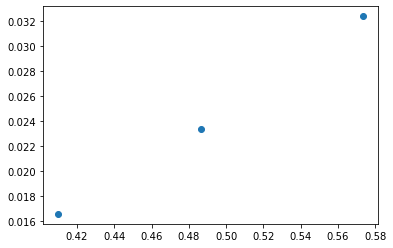

In [120]:
#plt.scatter(data_prom[["Set1.1","Set1.2","Set3.1","Set3.2","Set3.1","Set3.2"]], E[["Set1.1","Set1.2","Set3.1","Set3.2","Set3.1","Set3.2"]])
plt.scatter(data_prom[["Set1.1","Set4.1","Set7.1"]], 1/2*m_1*data_prom[["Set1.1","Set4.1","Set7.1"]]**2)

# Teórico #

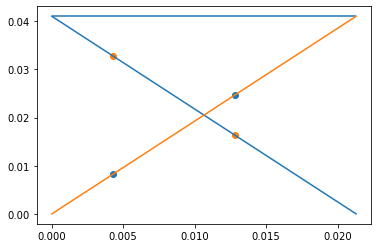

In [143]:
plt.plot(np.linspace(b_1, 0, 100), m_1*g*(b_1-np.linspace(b_1, 0, 100)))
plt.plot(np.linspace(b_1, 0, 100), m_1*g*np.linspace(b_1, 0, 100))
plt.hlines(m_1*g*b_1, 0, b_1)
plt.scatter(np.array([b1_h1, b1_h2]), m_1*g*(np.array([b1_h1, b1_h2])))
plt.scatter(np.array([b1_h1, b1_h2]), m_1*g*(b_1-np.array([b1_h1, b1_h2])))
# plt.scatter(data_prom[["Set1.1", "Set1.2"]], 1/2*m_1*data_prom[["Set1.1", "Set1.2"]]**2)

In [40]:
print(round(m_3*g*b_3, 3), "\n",E[["Set9.1", "Set9.2"]])

0.123 
    Set9.1  Set9.2
0   0.123    0.12


In [17]:
def v(b, h):
    v=np.sqrt(2*g*(b-h))
    return v

vel = []
b_inicial = [b_1, b_2, b_3]
for i in range(3):
    for j in range(2):
        vel.append(round(v(b_inicial[i],bloques[j+2*i]),4))
vel = pd.DataFrame(vel)
vel

,0
0,0.4078
1,0.5767
2,0.4875
3,0.6887
4,0.5767
5,0.8155


In [26]:
data_prom

,Set1.1,Set1.2,Set2.1,Set2.2,Set3.1,Set3.2,Set4.1,Set4.2,Set5.1,Set5.2,Set6.1,Set6.2,Set7.1,Set7.2,Set8.1,Set8.2,Set9.1,Set9.2
0,0.4099,0.57,0.4088,0.5702,0.4074,0.5682,0.4865,0.6805,0.4867,0.6793,0.4856,0.679,0.5732,0.8007,0.5738,0.8005,0.5756,0.7992


In [33]:
np.round((1-data_prom[data_prom.columns[13:18:2]].values/vel[0][5])*100,4)

array([[1.8148, 1.8394, 1.9988]])